## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loadinng the data

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


## Print description for revol_util

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


## Use feature information

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


# Exploratary data Analysis 

### Loading data and  other imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Data/lending_club_loan_two.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis

In [10]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

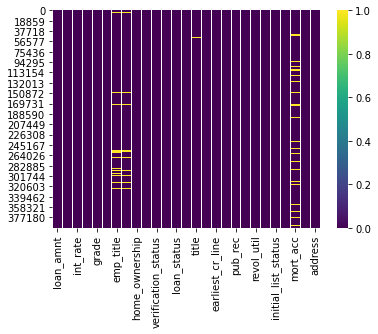

In [11]:
sns.heatmap(df.isnull(),cmap='viridis')

## COunt the plot to explore the labels

<AxesSubplot:xlabel='loan_status', ylabel='count'>

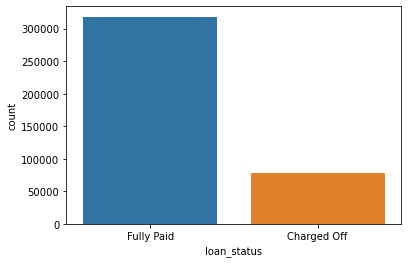

In [12]:
sns.countplot(x='loan_status',data = df)

##### Create histogram of loan amount

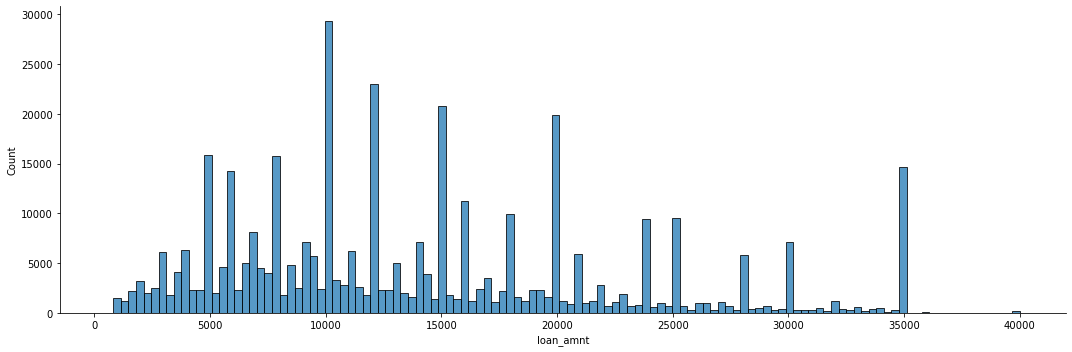

In [13]:
sns.displot(data=df,x='loan_amnt',kind='hist',aspect=3)

`explore correlation between the continous feature variables`

In [14]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

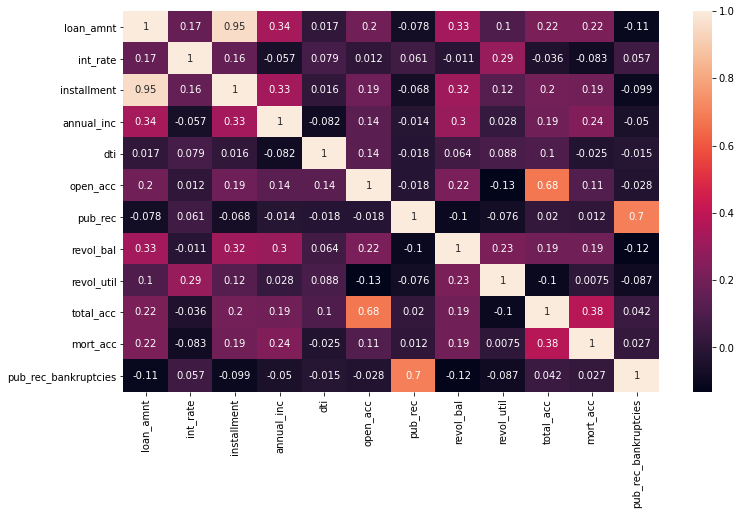

In [15]:
# visalising this
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

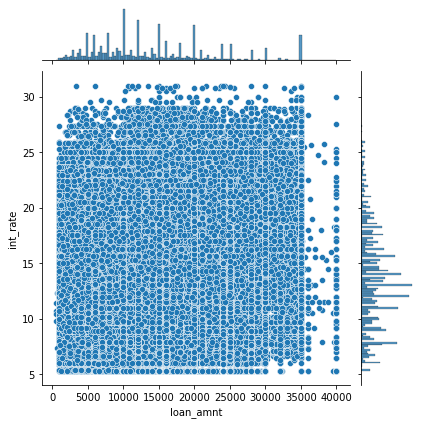

In [16]:
sns.jointplot(data= df,x='loan_amnt',y='int_rate')

<AxesSubplot:>

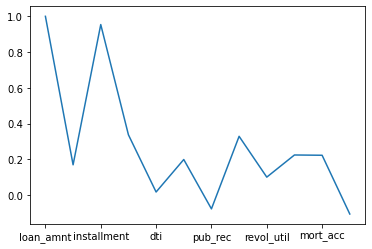

In [17]:
df.corr()['loan_amnt'].plot()

## Checking if there is duplicate information

In [18]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [19]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Checking relation between installment and loan amnt 

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

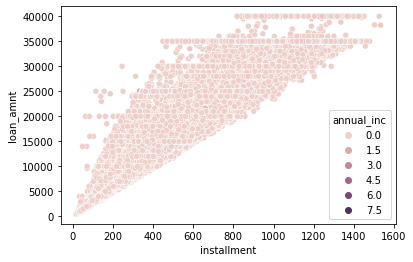

In [20]:
sns.scatterplot(x='installment',y='loan_amnt',hue='annual_inc',data=df,alpha=1)

### Show relationship between loan_status and loan_amnt

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

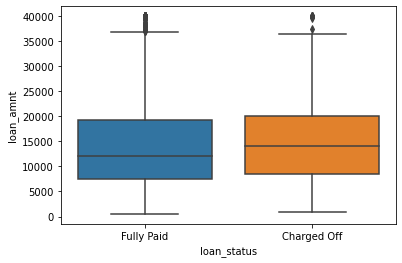

In [21]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

### Calculate summary statistics for the loan amnt,grouped by the loan_status

In [22]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Exploring Grade and Subgrade columns. Unnique possible grades and subgrades

In [23]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [24]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

#### CountPlot per grade. Set hue to loan_staus label

<AxesSubplot:xlabel='grade', ylabel='count'>

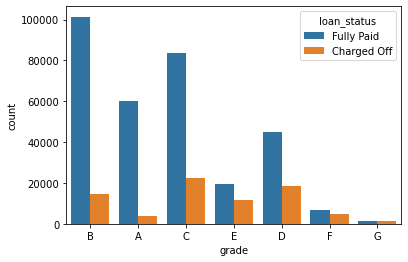

In [25]:
sns.countplot(x='grade',data=df,hue='loan_status')

### countplot per subgrade. Set hue to loan status label

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

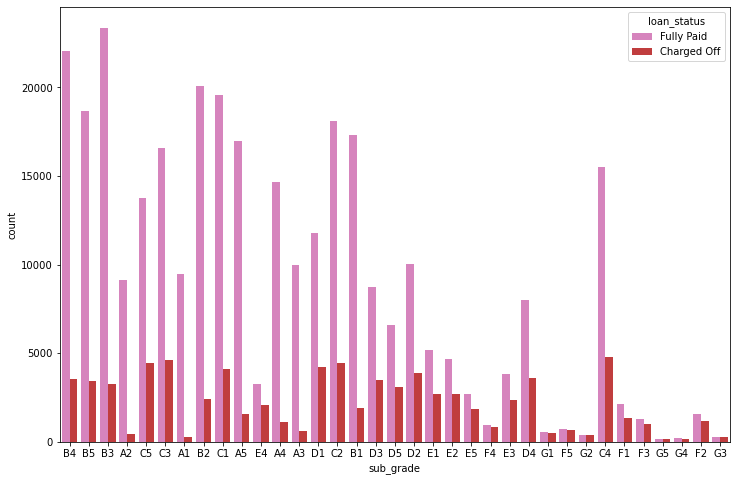

In [26]:
plt.figure(figsize=(12,8))

sns.countplot(x='sub_grade',data=df,hue='loan_status',palette='tab10_r')

### Print above in sorted format

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

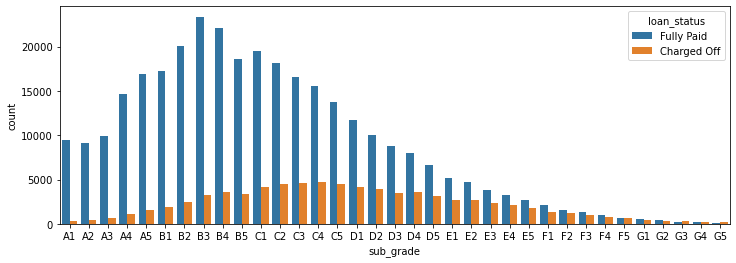

In [27]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
# subgrade_order
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order)


<AxesSubplot:xlabel='grade', ylabel='count'>

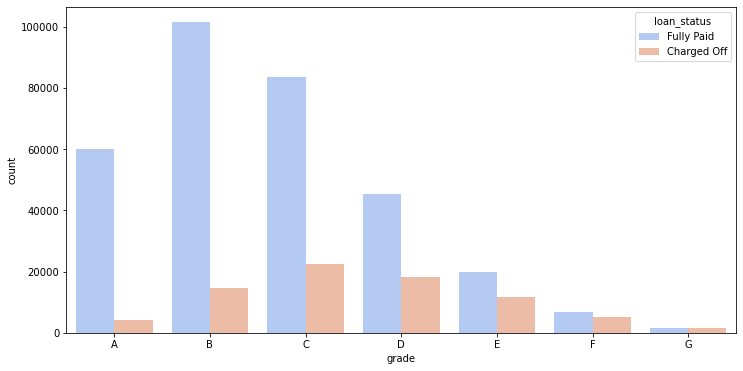

In [28]:
### Ordering grade column
plt.figure(figsize=(12,6))
grade_order = sorted(df['grade'].unique())
grade_order
sns.countplot(x='grade',data=df,hue='loan_status',order=grade_order,palette='coolwarm')

##### Looks like F and G subgrade don't get paid back that often and recreate the countplot just for those subgrades

In [29]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
f_and_g
# plt.figure(figsize=(12,6))
# subgrade = sorted(f_and_g['sub_grade'].unique())
# sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.00,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.00,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.00,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.00,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.00,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395875,10000.0,60 months,24.50,290.59,F,F3,soldier,10+ years,RENT,54000.00,...,10.0,0.0,23783.0,91.1,26.0,w,INDIVIDUAL,2.0,0.0,"PSC 1848, Box 3238\nAPO AA 29597"
395908,4075.0,36 months,24.99,162.00,F,F4,NaN,NaN,RENT,13000.00,...,7.0,0.0,4224.0,49.7,13.0,w,INDIVIDUAL,0.0,0.0,"57621 Benjamin Greens Apt. 527\nSouth Richard,..."
395957,14525.0,60 months,21.99,401.09,F,F1,AUDITOR,5 years,RENT,55000.00,...,7.0,1.0,5304.0,67.1,28.0,w,INDIVIDUAL,2.0,1.0,639 Gillespie Forge Apt. 571\nEast Robertmouth...
395976,16475.0,60 months,25.83,491.62,G,G2,assembly technician,7 years,OWN,55000.00,...,17.0,0.0,15548.0,41.2,55.0,f,INDIVIDUAL,0.0,0.0,"0288 Joseph Lakes Suite 493\nLarsonfurt, ID 70466"


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

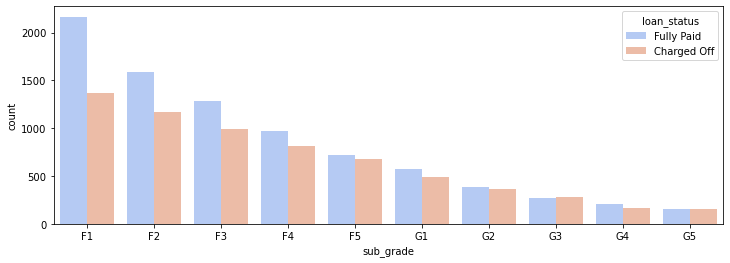

In [30]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

##### Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "fully paid" and a 0 if it was "charged off"

In [31]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [32]:
df[['loan_repaid','loan_status']]


,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


##### Create a bar plot showing the coorelation of the numeric features to the new loan_repaid column

In [33]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:>

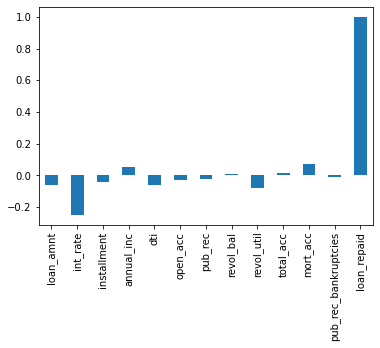

In [34]:
df.corr()['loan_repaid'].plot(kind='bar')

<AxesSubplot:>

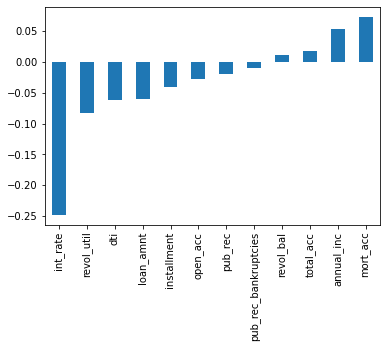

In [35]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Part-2 Dealing with Missing data

In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [37]:
len(df)

396030

#### Create a series that displays the total count of missing values per column

In [38]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Convert this series to be in term of percentage of the total DataFrame

In [40]:
(df.isnull().sum() / len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

## Examining emp_title and emp_length to examine wether is it okay to drop them.

In [41]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [42]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


### How many unique emplyment job title are there

In [43]:
df['emp_title'].describe()

count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

In [44]:
df['emp_title'].value_counts().sort_values()

Mustang Technology Group         1
Retail clerk                     1
Case Management Office           1
Document Review Specialist       1
Sapporo Japanese Grill           1
                              ... 
Supervisor                    1830
RN                            1846
Registered Nurse              1856
Manager                       4250
Teacher                       4389
Name: emp_title, Length: 173105, dtype: int64

#### There are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column

In [45]:
df = df.drop('emp_title',axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


### Create a count plot of the emp_length feature column. Sort order of the values

In [46]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

### It is still not sorted

In [50]:
emp_length_order = ['< 1 year',
 '1 year',
 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [51]:
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

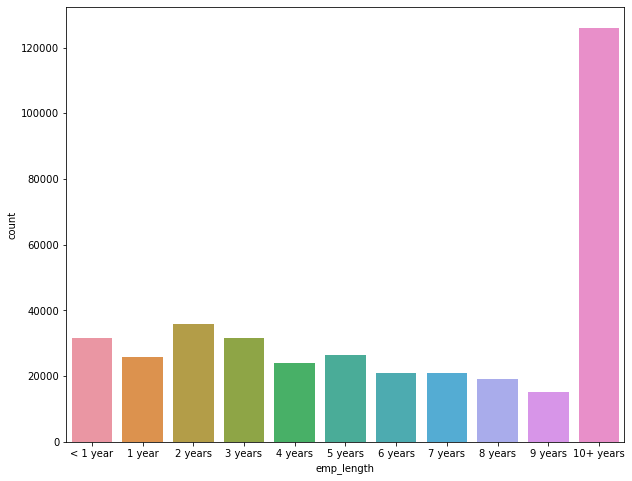

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data = df,x='emp_length', order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

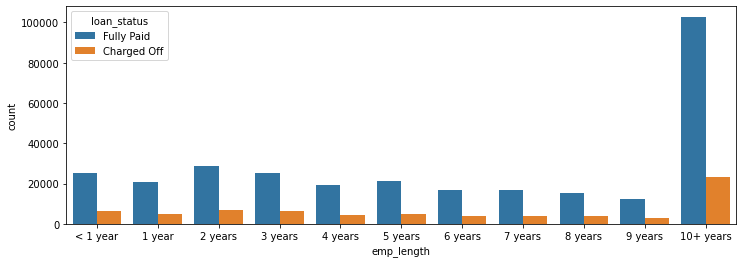

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,
             hue='loan_status')

#### Identify percentage of charge offs per category. 
`Essentialy  informing us what percentage of people per employmnt category didn'y pay back their loan`

In [57]:
df[df['loan_status']=='Charged Off']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,10+ years,MORTGAGE,95000.0,Source Verified,...,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\nPort Angela, NM...",0
396001,15000.0,60 months,15.61,361.67,D,D1,10+ years,MORTGAGE,47000.0,Source Verified,...,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\nAdrianstad, ME 22690",0
396002,17500.0,36 months,13.66,595.23,C,C3,< 1 year,RENT,70000.0,Source Verified,...,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\nFowlerville, AZ 70466",0
396011,13000.0,36 months,10.99,425.55,B,B4,10+ years,RENT,56000.0,Not Verified,...,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\nWest Josefurt, SC 30723",0


In [61]:
df[df['loan_status']=='Charged Off'].groupby("emp_length").count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [71]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [62]:
df[df['loan_status']=='Fully Paid']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
5,20000.0,36 months,13.33,677.07,C,C3,10+ years,MORTGAGE,86788.0,Verified,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [72]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

## Ratio  is 

In [75]:
ratio=emp_co/emp_fp
ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [76]:
ratio = pd.DataFrame(ratio)

In [82]:
ratio

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


In [87]:
ratio.columns=['loan status ratio']
ratio

,loan status ratio
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


In [93]:
emp_len=emp_co/(emp_co+emp_fp)
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [94]:
emp_len=pd.DataFrame(emp_len)

In [97]:
emp_len.columns=['loan status percentage']
emp_len

,loan status percentage
emp_length,
1 year,0.199135
10+ years,0.184186
2 years,0.193262
3 years,0.195231
4 years,0.192385
5 years,0.192187
6 years,0.189194
7 years,0.194774
8 years,0.199760


<AxesSubplot:xlabel='emp_length', ylabel='loan status percentage'>

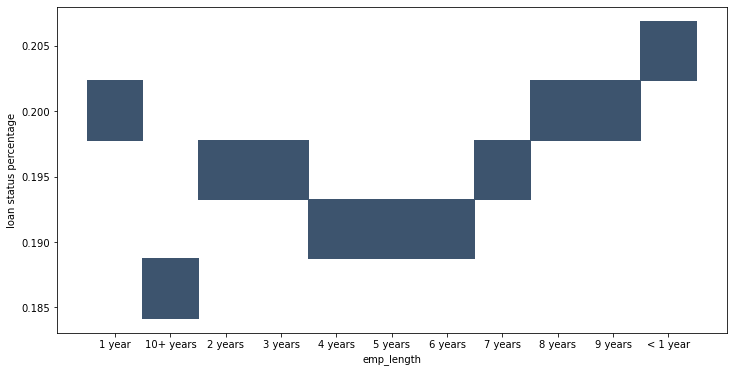

In [105]:
plt.figure(figsize=(12,6))
sns.histplot(data=emp_len,y='loan status percentage',x='emp_length')

<AxesSubplot:xlabel='emp_length'>

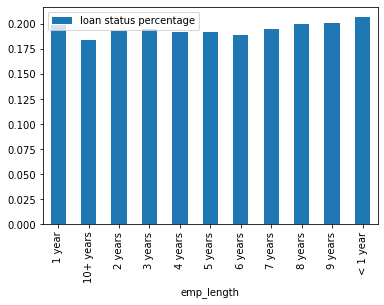

In [107]:
emp_len.plot(kind='bar')

### Since charge off rates are extremly similar accross all employment lengths. Drop emp_length column

In [109]:
df = df.drop('emp_length',axis=1)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


### Check which columns still have missing data

In [111]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<AxesSubplot:>

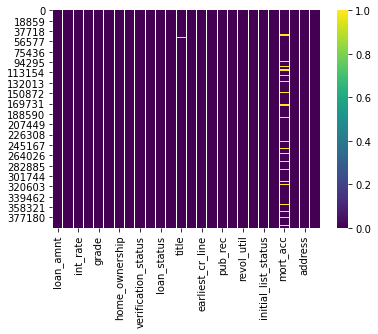

In [113]:
sns.heatmap(df.isnull(),cmap='viridis')

In [117]:
! git add Lending_Club_project.ipynb
! git commit -m "17:10/26-06-2021"
! git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../Classification/DecisionTree_RandomForest/Decision_Trees_and_Random_Forest_Project.ipynb
	modified:   ../Classification/KNN/K_Nearest_Neighbors_Project.ipynb
	modified:   ../Classification/KNN/Knn_Intro.ipynb
	modified:   ../Classification/SVM/SVM_intro.ipynb
	modified:   ../Classification/SVM/Support_Vector_Machines_Project.ipynb
	modified:   ../Clustering/K_Means/KMeans_intro.ipynb
	modified:   ../Clustering/K_Means/K_Means_Clustering_Project.ipynb
	modified:   Feature_EDA_Classification_callbacks.ipynb
	modified:   Feature_Engineering_EDA_Regression.ipynb
	modified:   Gem_model.ipynb
	modified:   Lending_Club_project.ipynb
	modified:   ../Linear Regression/Housing.ipynb
	modified:   ../Logistic Regression/Logistic_Regression_Project.ipynb
	modifi

Everything up-to-date
